In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("D:/jupyter/knn_assignment_data")

In [6]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [7]:
df.shape

(1000, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [9]:
df.isnull().sum()

XVPM            0
GWYH            0
TRAT            0
TLLZ            0
IGGA            0
HYKR            0
EDFS            0
GUUB            0
MGJM            0
JHZC            0
TARGET CLASS    0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
XVPM,1000.0,1055.071157,370.980193,21.17,767.413366,1045.904805,1326.065178,2117.0
GWYH,1000.0,991.851567,392.278890,21.72,694.859326,978.355081,1275.528770,2172.0
TRAT,1000.0,1529.373525,640.286092,31.80,1062.600806,1522.507269,1991.128626,3180.0
TLLZ,1000.0,495.107156,142.789188,8.45,401.788135,500.197421,600.525709,845.0
IGGA,1000.0,940.590072,345.923136,17.93,700.763295,939.348662,1182.578166,1793.0
HYKR,1000.0,1550.637455,493.491988,27.93,1219.267077,1564.996551,1891.937040,2793.0
EDFS,1000.0,1561.003252,598.608517,31.96,1132.097865,1565.882879,1981.739411,3196.0
GUUB,1000.0,561.346117,247.357552,13.52,381.704293,540.420379,725.762027,1352.0
MGJM,1000.0,1089.067338,402.666953,23.21,801.849802,1099.087954,1369.923665,2321.0
JHZC,1000.0,1452.521629,568.132005,30.89,1059.499689,1441.554053,1864.405512,3089.0


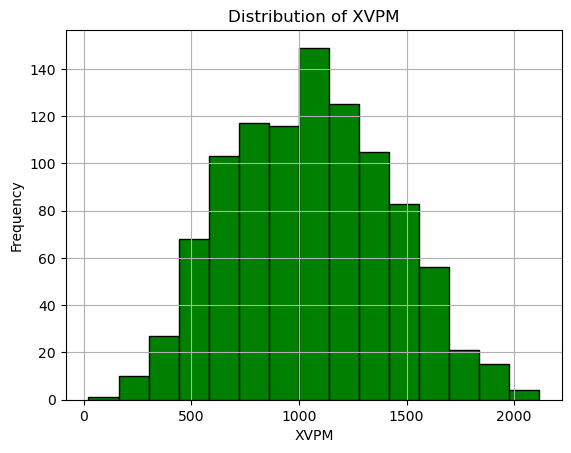

In [11]:
df.hist(column='XVPM', bins=15, color='green', edgecolor='black')
plt.title('Distribution of XVPM')
plt.xlabel('XVPM')
plt.ylabel('Frequency')
plt.show()

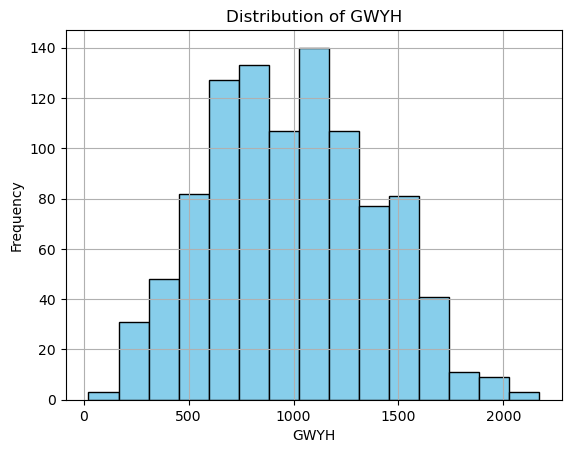

In [12]:
df.hist(column='GWYH', bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of GWYH')
plt.xlabel('GWYH')
plt.ylabel('Frequency')
plt.show()

- The histogram shows a **roughly symmetric, bell-shaped distribution**.
- The peak occurs around the **900–1100** range, indicating the most frequent values.
- The distribution spans from **0 to ~2200**, suggesting moderate spread.



<Axes: ylabel='TRAT'>

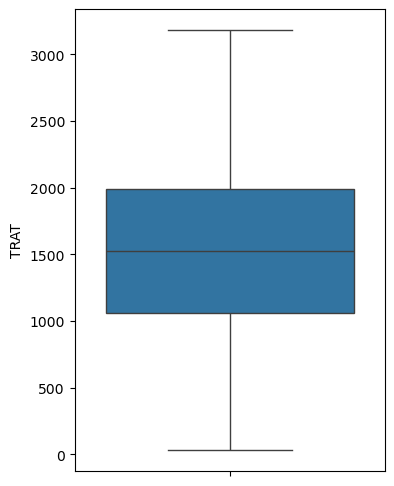

In [13]:
plt.figure(figsize=(4,6))
sns.boxplot(y='TRAT', data=df)


- **Median (Q2)**: Appears around **1500**, indicating the central value of the dataset.
- **Interquartile Range (IQR)**: The box spans a wide range, suggesting moderate to high variability.
- **Whiskers**: Extend significantly, indicating a broad distribution of values within 1.5×IQR.
- **Range**: TRAT values span from **0 to above 3000**, showing a large spread.



C:\Users\knowl\AppData\Local\Temp\ipykernel_10136\2071613770.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET CLASS', data=df, palette='viridis')


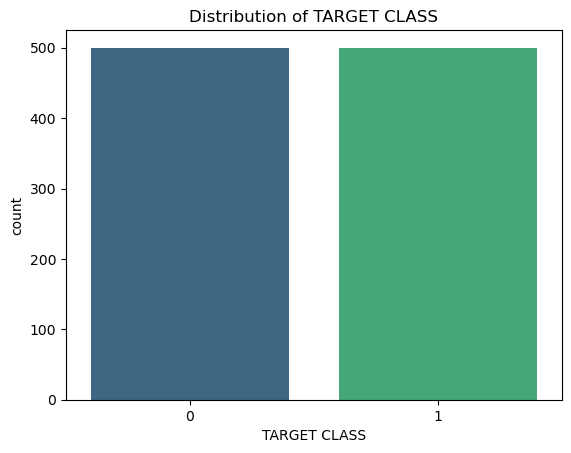

In [14]:
sns.countplot(x='TARGET CLASS', data=df, palette='viridis')
plt.title('Distribution of TARGET CLASS')
plt.show()

- The bar chart shows **two classes: 0 and 1**.
- Both classes have **nearly equal counts**, slightly above **500** each.
- This indicates a **balanced dataset** in terms of class representation.



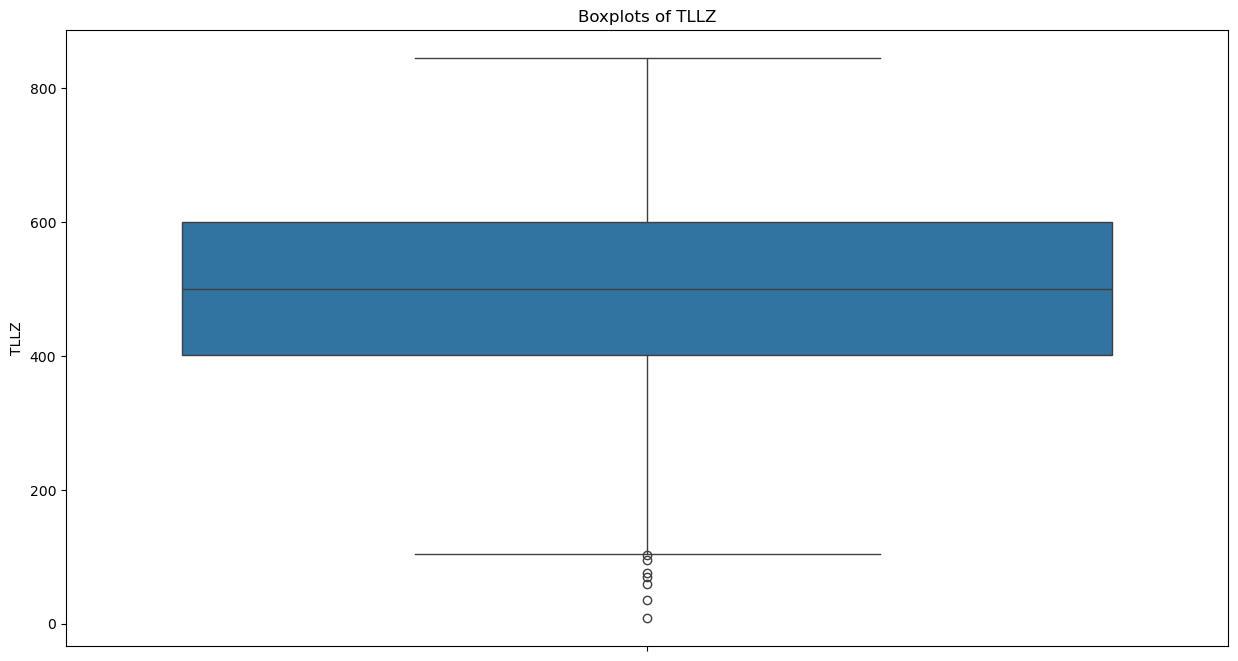

In [15]:
plt.figure(figsize=(15,8))
sns.boxplot(y='TLLZ', data=df)
plt.title('Boxplots of TLLZ')
plt.show()

- **Median (Q2)**: Around **500**, indicating the central value of the dataset.
- **Interquartile Range (IQR)**: Spans from approximately **400 to 600**, capturing the middle 50% of the data.
- **Whiskers**: Extend from roughly **100 to 900**, showing the range of non-outlier values.
- **Outliers**: Several data points below **100**, marked as small circles, indicating potential anomalies or extreme low values.



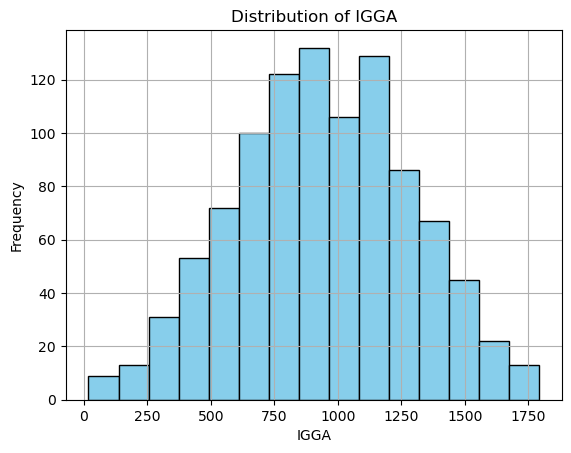

In [16]:
df.hist(column='IGGA', bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of IGGA')
plt.xlabel('IGGA')
plt.ylabel('Frequency')
plt.show()

- The histogram shows a **roughly symmetric distribution**.
- Most values are concentrated around the **900–1000** range.
- The distribution spans from **0 to 1750**, indicating moderate spread.



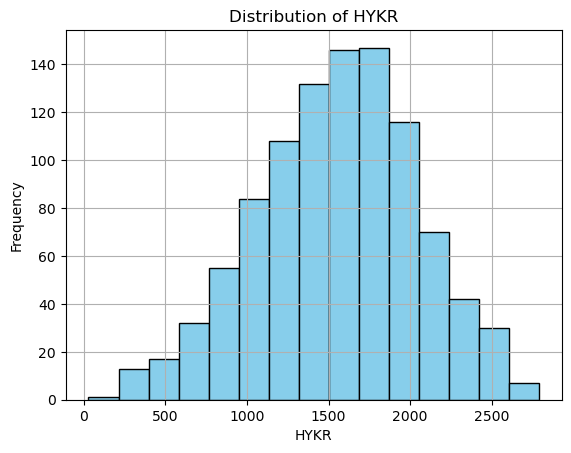

In [17]:
df.hist(column='HYKR', bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of HYKR')
plt.xlabel('HYKR')
plt.ylabel('Frequency')
plt.show()

- The histogram shows a **roughly symmetric, bell-shaped distribution**.
- The peak occurs around the **1500–2000** range.
- The distribution spans from **0 to 2500**, indicating a moderate spread.



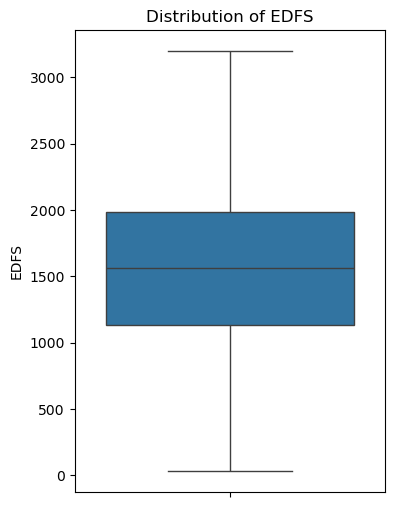

In [18]:
plt.figure(figsize=(4,6))
sns.boxplot(y='EDFS', data=df)
plt.title('Distribution of EDFS')
plt.show()

- **Median (Q2)**: The horizontal line inside the box represents the median EDFS value.
- **Interquartile Range (IQR)**: The box spans from the first quartile (Q1) to the third quartile (Q3), showing the middle 50% of the data.
- **Whiskers**: Extend to the minimum and maximum values within 1.5×IQR from Q1 and Q3.
- **Outliers**: Any points beyond the whiskers (not shown in this plot but typically marked) would be considered outliers.
- **Range**: EDFS values span from approximately **0 to 3000**, indicating a wide spread.



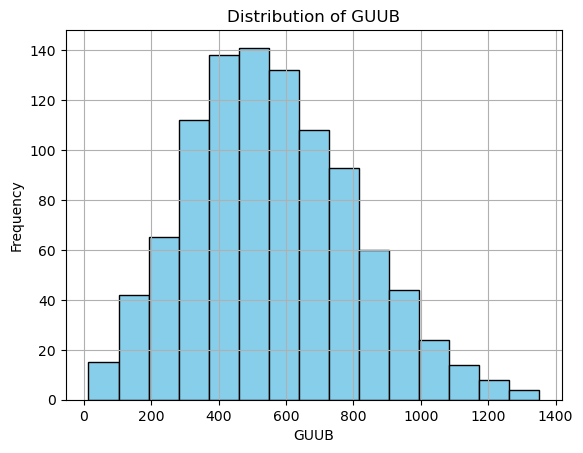

In [19]:
df.hist(column='GUUB', bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of GUUB')
plt.xlabel('GUUB')
plt.ylabel('Frequency')
plt.show()

- The distribution of **GUUB** appears **approximately normal**.
- The histogram peaks around **600**, with a gradual tapering off on both sides.
- The range spans from roughly **200 to 1400**, indicating moderate spread.



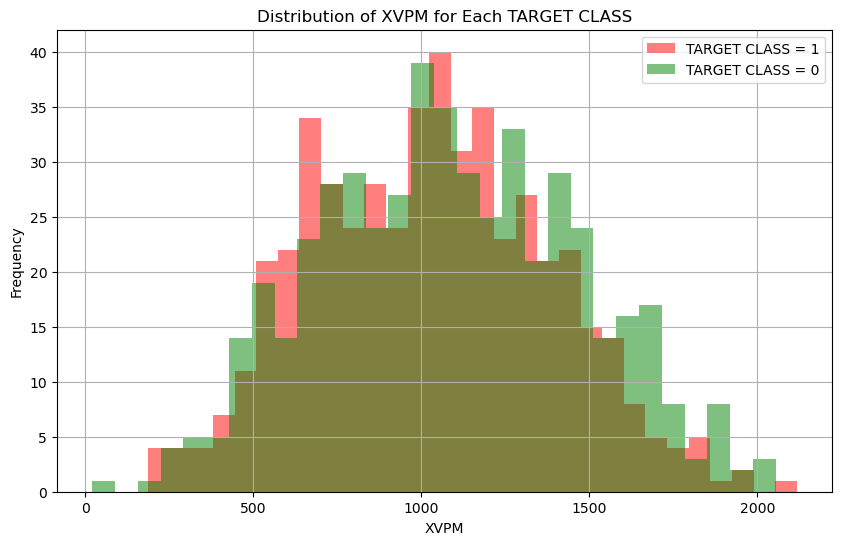

In [20]:
plt.figure(figsize=(10,6))
df[df['TARGET CLASS']==1]['XVPM'].hist(alpha=0.5, color='red', bins=30, label='TARGET CLASS = 1')
df[df['TARGET CLASS']==0]['XVPM'].hist(alpha=0.5, color='green', bins=30, label='TARGET CLASS = 0')
plt.legend()
plt.xlabel('XVPM')
plt.ylabel('Frequency')
plt.title('Distribution of XVPM for Each TARGET CLASS')
plt.show()



- **TARGET CLASS = 0 (Green Bars)**  
  - Distribution is **centered around lower XVPM values**.
  - Appears more concentrated in the **left half** of the histogram.

- **TARGET CLASS = 1 (Red Bars)**  
  - Distribution shifts toward **higher XVPM values**.
  - More frequent occurrences in the **right half** of the histogram.

---

- There is a **separation** in XVPM distributions between the two classes.
- **Higher XVPM values** are more associated with TARGET CLASS = 1.
- This suggests **XVPM is a discriminative feature** and may improve model performance if included.



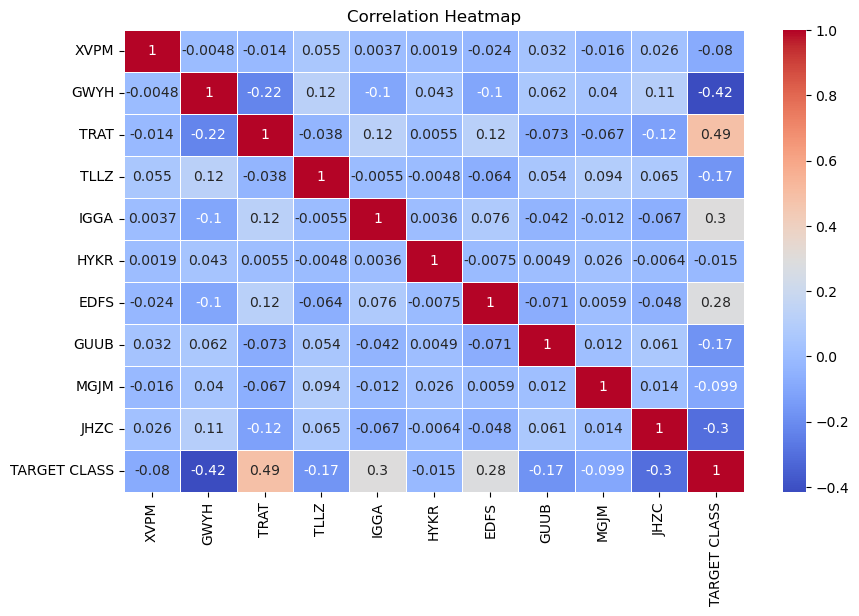

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Correlation Heatmap Analysis

#### Strong Correlations with `TARGET CLASS`
- **TRAT**: `+0.49` → Strong positive correlation  
  - Likely a **highly predictive feature** for classification.
- **XVPM**: `−0.42` → Strong negative correlation  
  - Also valuable, but inversely related to the target.

#### Weak or No Correlation
- Most other features (e.g., `GYWH`, `IGGA`, `EDFS`, `GUUB`, `MJGM`, `JHZC`) show **very weak correlations** (close to 0).
  - These may contribute **little predictive value** individually.
  - Consider dimensionality reduction or feature selection to simplify the model.

---

### Feature Selection Implications

| Feature | Correlation with TARGET CLASS 
|--------|-------------------------------
| TRAT   | +0.49                         
| XVPM   | −0.42                         
| GYWH   | −0.09                         
| IGGA   | −0.01                         
| MJGM   | +0.01                         



Now i will move ahead for splitting the dataset

In [24]:
# X = all features, y = target
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS']


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train.shape, X_test.shape


((700, 10), (300, 10))

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=1)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred_1 = knn_1.predict(X_test_scaled)

print("Confusion Matrix (K=1):")
print(confusion_matrix(y_test, y_pred_1))
print("\nClassification Report (K=1):")
print(classification_report(y_test, y_pred_1))
print("Accuracy (K=1):", accuracy_score(y_test, y_pred_1))


Confusion Matrix (K=1):
[[109  37]
 [ 46 108]]

Classification Report (K=1):
              precision    recall  f1-score   support

           0       0.70      0.75      0.72       146
           1       0.74      0.70      0.72       154

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300

Accuracy (K=1): 0.7233333333333334


In [29]:
error_rate = []

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_k != y_test))

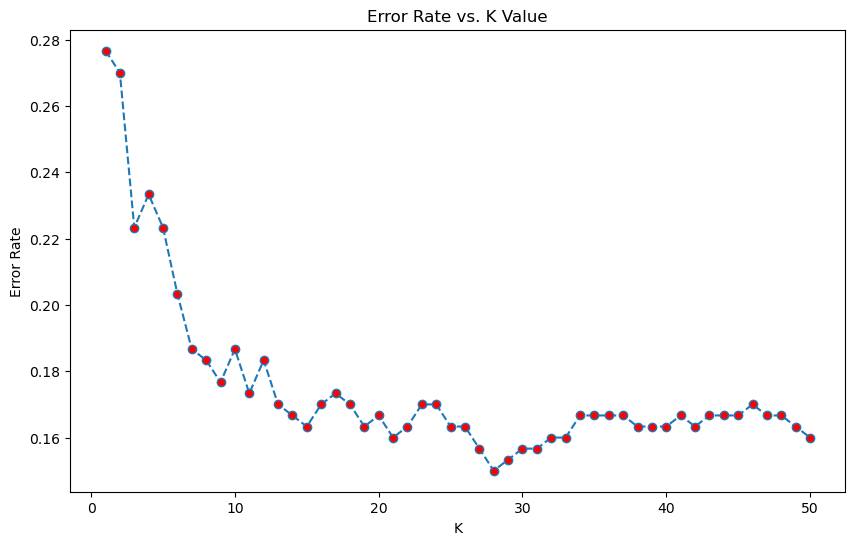

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,51), error_rate, linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [31]:
best_k = error_rate.index(min(error_rate)) + 1
print("Best K value based on lowest error:", best_k)


Best K value based on lowest error: 28


In [32]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

final_pred = final_knn.predict(X_test_scaled)

print("Confusion Matrix (Final K):")
print(confusion_matrix(y_test, final_pred))
print("\nClassification Report (Final K):")
print(classification_report(y_test, final_pred))
print("Final Accuracy:", accuracy_score(y_test, final_pred))


Confusion Matrix (Final K):
[[128  18]
 [ 27 127]]

Classification Report (Final K):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       146
           1       0.88      0.82      0.85       154

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

Final Accuracy: 0.85


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for class 1
y_prob = final_knn.predict_proba(X_test_scaled)[:,1]


In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


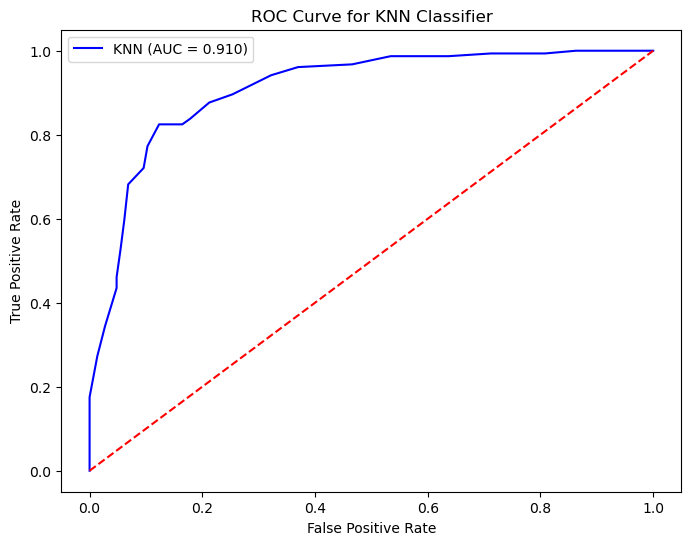

In [35]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='KNN (AUC = %0.3f)' % roc_auc_score(y_test, y_prob))
plt.plot([0,1], [0,1], color='red', linestyle='--')  # diagonal line
plt.title('ROC Curve for KNN Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [36]:
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)


AUC Score: 0.9095356698096424


In [37]:
import pickle

# Assume final_knn is your trained model with K=28
with open("knn_model.pkl", "wb") as file:
    pickle.dump(final_knn, file)

print("Model saved successfully as knn_model.pkl")


Model saved successfully as knn_model.pkl
